<a href="https://colab.research.google.com/github/NikolaJokovic/Principi-prezentacije-i-prepoznavanje-oblika/blob/main/DetekcijaLica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #povezivanje mog drive-a na kom su fotografije iz dataseta

!pip install opencv-python #instalacija opencv-a koji se koisti za procesuiranje fotografija
import cv2
import os
from matplotlib import pyplot as plt #koristi se za kreiranje vizuelizacija


In [58]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#ucitava Haar cascade za detekciju lica, Haar je jednostavan ali efektivan klasifikator koji se koristi za detekciju objekata,
#u ovom slucaju specijalno treniran za detekciju lica
def detect_faces(image_path):
    img = cv2.imread(image_path)# citanje fotografije naspram prosledjene putanje

    #konvertuje fotografiju u grayscale,jer Haar to zahteva jer je lakse i brze da procesuje fotografije
    #u samo sivoj boji naspram standardnog formata RGB
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #koristi se metoda detectMutliScale koja je definisana u Haar cascade klasi, ona ima vise prosledjenih parametara,
    #gray- fotografija koja je prosledjena,
    #scaleFactor-odredjuje koliko ce fotografija biti smanjena u svakom koraku(pomaze u otkrivanju lica razlicitih velicina),
    #minNeighbors- određuje koliko susednih delova treba da ima svaki izabrani pravougaonik da bi bio zadrzan,
    #minSize-minimalna velicina detektovanog lica
    faces = face_cascade.detectMultiScale(gray,scaleFactor= 1.03,minNeighbors= 30,minSize=(500,500))
    #scaleFactor je podesen na 1.03 zbog preciznijeg odredjivanja lica,
    #minNeighbours je podesen na veliki broj jer u vecini slucajeva samo prvugaonik oko lica ispunjava uslov od 30
    #minSize je podesen na veliki broj jer su vecina slika u velikoj rezoluciji i desava se da postoji pravugaonik
    #koji ne predstavlja lice koji je detektovan uprkos predhodno podesenim parametrima,ovo resava taj problem

    #Crta pravugaonik oko otkrivenog lica
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 10)

    #prikazuje fotografiju i konvertuje je nazad u RGB jer matplotlib je ocekujeu tom formatu
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

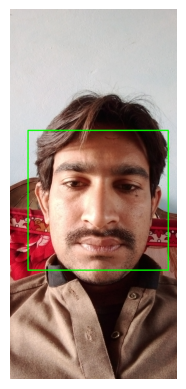

In [55]:
#postavljena putanja fotografije iz drive-a
test_image_path = '/content/drive/MyDrive/Gender_Dataset/test/men/132.jpg'
#proverava da li je path postojeci i poziva predhodno kreiranu funkciju kojoj prosledjuje fotografiju
img = cv2.imread(test_image_path)
if img is None:
    print(f"Could not read the image: {test_image_path}")
else: detect_faces(test_image_path)

